In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [22]:
X_train = data.train.images
y_train = data.train.labels

X_test = data.test.images
y_test = data.test.labels

In [23]:
print (X_train.shape)
print (y_train.shape)

(55000, 784)
(55000, 10)


In [24]:
index2label = {0 : "T-shirt/top",
               1 : "Trouser",
               2 : "Pullover",
               3 : "Dress",
               4 : "Coat",
               5 : "Sandal",
               6 : "Shirt",
               7 : "Sneaker",
               8 : "Bag",
               9 : "Ankle boot",
              }

In [25]:
def display_digit(x, y, i):
    s = [i for i,x in enumerate(y_train[i]) if x == 1]
    label = index2label.get(s[0])
    image = x[i].reshape([28,28])
    plt.title('Example: %d  Label: %s' % (i, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

def display_mult_flat(start, stop, x):
    images = x[start].reshape([1,784])
    for i in range(start + 1, stop):
        images = np.concatenate((images, x[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray'))
    plt.show()

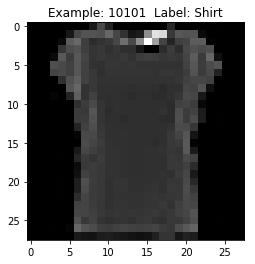

In [26]:
display_digit(X_train, y_train, 10101)

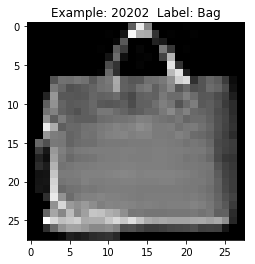

In [27]:
display_digit(X_train, y_train, 20202)

In [28]:
X = tf.placeholder(tf.float32, shape=(None, 784))
y_ = tf.placeholder(tf.float32, shape=(None, 10))

In [29]:
learning_rate = tf.placeholder(tf.float32)
prob = tf.placeholder(tf.float32)

In [30]:
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
B2 = tf.Variable(tf.zeros([100]))
W3 = tf.Variable(tf.truncated_normal([100, 50], stddev=0.1))
B3 = tf.Variable(tf.zeros([50]))
W4 = tf.Variable(tf.truncated_normal([50, 32], stddev=0.1))
B4 = tf.Variable(tf.zeros([32]))
W5 = tf.Variable(tf.truncated_normal([32, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

In [31]:
y = tf.nn.relu(tf.matmul(X, W1) + B1)
y = tf.nn.dropout(y, prob)

y = tf.nn.relu(tf.matmul(y, W2) + B2)
y = tf.nn.dropout(y, prob)

y = tf.nn.relu(tf.matmul(y, W3) + B3)
y = tf.nn.dropout(y, prob)

y = tf.nn.relu(tf.matmul(y, W4) + B4)
y = tf.nn.dropout(y, prob)

y = tf.matmul(y, W5) + B5

In [32]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [33]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [34]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [35]:
train = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [36]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [37]:
for i in range(10000):
    batch_xs, batch_ys = data.train.next_batch(128)
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0 
    lr = min_learning_rate + (max_learning_rate - min_learning_rate) * np.math.exp(-i/decay_speed)
    
    _, loss, acc = sess.run([train, cost, accuracy], feed_dict={X: batch_xs, y_: batch_ys, learning_rate : lr, prob : 0.75})
    
    if (i % 1000 == 0):
        print("Epoch: {}, Loss: {}, Accuracy: {} ".format(i, loss, acc))

Epoch: 0, Loss: 2.315293550491333, Accuracy: 0.109375 
Epoch: 1000, Loss: 0.5418054461479187, Accuracy: 0.8671875 
Epoch: 2000, Loss: 0.4019949436187744, Accuracy: 0.828125 
Epoch: 3000, Loss: 0.26780641078948975, Accuracy: 0.90625 
Epoch: 4000, Loss: 0.30409663915634155, Accuracy: 0.8984375 
Epoch: 5000, Loss: 0.27418267726898193, Accuracy: 0.9140625 
Epoch: 6000, Loss: 0.36170607805252075, Accuracy: 0.8671875 
Epoch: 7000, Loss: 0.25609341263771057, Accuracy: 0.921875 
Epoch: 8000, Loss: 0.24351562559604645, Accuracy: 0.921875 
Epoch: 9000, Loss: 0.268534779548645, Accuracy: 0.921875 


In [38]:
print("Test Accuracy:{}".format(sess.run([accuracy], feed_dict={X: data.test.images,
                                      y_: data.test.labels, learning_rate : lr, prob : 0.75})))

Test Accuracy:[0.86909997]
